In [1]:
"""
Looking for any barcodes that only differ on the YA
"""

import gzip
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
from scipy import stats
import seaborn as sns
import pandas as pd
import pingouin as pg


def r2(x,y):
    slope, intercept, r_value, p_value, std_err = linregress(x,y)
    return r_value**2


def Pearson_r(x,y):
    slope, intercept, r_value, p_value, std_err = linregress(x,y)
    return r_value

plt.rcParams["figure.figsize"] = (3.5,2.5)
figures_dir = "/JTE-607/Analysis/Figures/Revisions_1/"

In [2]:
"""
Search function for YA pairs of barcode regions within each backbone
"""
def search_YA_pairs(barcodes_set, prefix_len=-1):
    Y_opposite_map = {"C": "T", "T": "C"}
    dinucleotide_pairs = {}  # barcode ending in C -> barcode ending in T
    for barcode in barcodes_set:
        Y_identity = barcode[prefix_len - 1]
        if Y_identity in Y_opposite_map.keys():
            search_barcode = barcode[:(prefix_len - 1)] + Y_opposite_map[Y_identity] + barcode[prefix_len:]
            if search_barcode in barcodes_set:
                if Y_identity == "C":
                    dinucleotide_pairs[barcode] = search_barcode
                else:
                    dinucleotide_pairs[search_barcode] = barcode
    return dinucleotide_pairs


L3_barcodes_12p5uM = {}  # barcode -> 12p5uM_log_ratio
SVLst_barcodes_12p5uM = {}  # barcode -> 12p5uM_log_ratio
with gzip.open("/JTE-607/Analysis/Figures/JTE607_CNN_25nt_6epoch_4col_model_6/Figure_3/L3_SVLst_merged_logratios.csv.gz", "rt") as f:
    f.readline()  # throw away header
    for line in f:
        var = line.split()
        if var[5] == "L3":
            L3_barcodes_12p5uM[var[4]] = float(var[3])
        elif var[5] == "SVLst":
            SVLst_barcodes_12p5uM[var[4]] = float(var[3])

# find barcodes in each backbone that only differ on the YA
L3_barcodes_set = set(L3_barcodes_12p5uM.keys())
SVLst_barcodes_set = set(SVLst_barcodes_12p5uM.keys())
L3_dinucleotide_pairs = search_YA_pairs(L3_barcodes_set, 13)
SVLst_dinucleotide_pairs = search_YA_pairs(SVLst_barcodes_set, 12)

print("len(L3_dinucleotide_pairs.keys()) = ", len(L3_dinucleotide_pairs.keys()))
print("len(SVLst_dinucleotide_pairs.keys()) = ", len(SVLst_dinucleotide_pairs.keys()))


len(L3_dinucleotide_pairs.keys()) =  0
len(SVLst_dinucleotide_pairs.keys()) =  0


In [3]:
"""
Since no exact YA changes, aggregating all CA vs. TA dinucleotide identities within each background.
"""

def classify_YA_identity(PAS_fullseq, prefix_len=-1):
    Y_identity = PAS_fullseq[prefix_len - 1]
    return Y_identity


def separate_CA_YA_PAS(PAS_set, prefix_len=-1):
    CA_seqs = []
    TA_seqs = []
    for PAS_seq in PAS_set:
        Y_identity = classify_YA_identity(PAS_seq, prefix_len)
        if Y_identity == "C":
            CA_seqs.append(PAS_seq)
        elif Y_identity == "T":
            TA_seqs.append(PAS_seq)
    return CA_seqs, TA_seqs


L3_CA_seqs, L3_TA_seqs = separate_CA_YA_PAS(L3_barcodes_set, 13)
SVLst_CA_seqs, SVLst_TA_seqs = separate_CA_YA_PAS(SVLst_barcodes_set, 12)

print("len(L3_CA_seqs) = ", len(L3_CA_seqs))
print("len(L3_TA_seqs) = ", len(L3_TA_seqs))
print("len(SVLst_CA_seqs) = ", len(SVLst_CA_seqs))
print("len(SVLst_TA_seqs) = ", len(SVLst_TA_seqs))


len(L3_CA_seqs) =  84677
len(L3_TA_seqs) =  73599
len(SVLst_CA_seqs) =  61111
len(SVLst_TA_seqs) =  41900


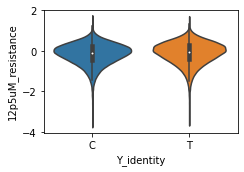

L3 mean 12.5uM CA vs. TA =  -0.14754117123662855 -0.10234311330290077
t-test ind L3 12.5uM CA vs. TA =  Ttest_indResult(statistic=-16.756905800957934, pvalue=5.740853169220908e-63)
Hedge's g =  -0.08474608627258774
Cohen's d =  -0.08474648785444128
n =  84677


/home/ec2-user/anaconda3/envs/tensorflow2_p37/lib/python3.7/site-packages/pingouin/effsize.py:779: UserWarning: x and y have unequal sizes. Switching to paired == False.
  warnings.warn("x and y have unequal sizes. Switching to " "paired == False.")


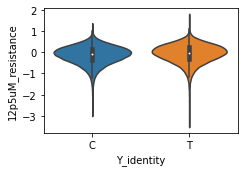

SVLst mean 12.5uM CA vs. TA =  -0.12086141789977765 -0.05632661693398257
t-test ind SVLst 12.5uM CA vs. TA =  Ttest_indResult(statistic=-23.385007452237634, pvalue=1.4198675809471321e-120)
Hedge's g =  -0.14927890164438795
Cohen's d =  -0.1492799885422622
n =  61111


/home/ec2-user/anaconda3/envs/tensorflow2_p37/lib/python3.7/site-packages/pingouin/effsize.py:779: UserWarning: x and y have unequal sizes. Switching to paired == False.
  warnings.warn("x and y have unequal sizes. Switching to " "paired == False.")


<Figure size 252x180 with 0 Axes>

In [4]:
"""
Plot drug resistance at 12.5uM
"""

L3_C_12p5uM_vals = [L3_barcodes_12p5uM[curr_seq] for curr_seq in L3_CA_seqs]
L3_T_12p5uM_vals = [L3_barcodes_12p5uM[curr_seq] for curr_seq in L3_TA_seqs]
L3_Y_12p5uM_df = pd.DataFrame(list(zip(L3_C_12p5uM_vals + L3_T_12p5uM_vals, \
                                       ["C"] * len(L3_C_12p5uM_vals) + ["T"] * len(L3_T_12p5uM_vals))), \
                              columns = ["12p5uM_resistance", "Y_identity"])
L3_Y_12p5uM_df.to_csv('/JTE-607/Analysis/Figures/Source_Data/L3_Y_12p5uM_resistance_df.tsv', sep="\t", index=True)
sns.violinplot(data=L3_Y_12p5uM_df, x="Y_identity", y="12p5uM_resistance", clip=0)
plt.tight_layout()
plt.savefig(figures_dir + "L3_YA_fullPAS_resistance_scatter.pdf")
plt.show()
plt.clf()
print("L3 mean 12.5uM CA vs. TA = ", np.mean(L3_C_12p5uM_vals), np.mean(L3_T_12p5uM_vals))
print("t-test ind L3 12.5uM CA vs. TA = ", stats.ttest_ind(L3_C_12p5uM_vals, L3_T_12p5uM_vals, equal_var=False))
print("Hedge's g = ", pg.compute_effsize(L3_C_12p5uM_vals, L3_T_12p5uM_vals, paired=True, eftype='hedges'))
print("Cohen's d = ", pg.compute_effsize(L3_C_12p5uM_vals, L3_T_12p5uM_vals, paired=True, eftype='cohen'))
print("n = ", len(L3_C_12p5uM_vals))

SVLst_C_12p5uM_vals = [SVLst_barcodes_12p5uM[curr_seq] for curr_seq in SVLst_CA_seqs]
SVLst_T_12p5uM_vals = [SVLst_barcodes_12p5uM[curr_seq] for curr_seq in SVLst_TA_seqs]
SVLst_Y_12p5uM_df = pd.DataFrame(list(zip(SVLst_C_12p5uM_vals + SVLst_T_12p5uM_vals, \
                                          ["C"] * len(SVLst_C_12p5uM_vals) + ["T"] * len(SVLst_T_12p5uM_vals))), \
                              columns = ["12p5uM_resistance", "Y_identity"])
SVLst_Y_12p5uM_df.to_csv('/JTE-607/Analysis/Figures/Source_Data/SVLst_Y_12p5uM_resistance_df.tsv', sep="\t", index=True)
sns.violinplot(data=SVLst_Y_12p5uM_df, x="Y_identity", y="12p5uM_resistance", clip=0)
plt.tight_layout()
plt.savefig(figures_dir + "SVLst_YA_fullPAS_resistance_scatter.pdf")
plt.show()
plt.clf()
print("SVLst mean 12.5uM CA vs. TA = ", np.mean(SVLst_C_12p5uM_vals), np.mean(SVLst_T_12p5uM_vals))
print("t-test ind SVLst 12.5uM CA vs. TA = ", stats.ttest_ind(SVLst_C_12p5uM_vals, SVLst_T_12p5uM_vals, equal_var=False))
print("Hedge's g = ", pg.compute_effsize(SVLst_C_12p5uM_vals, SVLst_T_12p5uM_vals, paired=True, eftype='hedges'))
print("Cohen's d = ", pg.compute_effsize(SVLst_C_12p5uM_vals, SVLst_T_12p5uM_vals, paired=True, eftype='cohen'))
print("n = ", len(SVLst_C_12p5uM_vals))


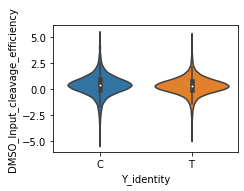

L3 mean input_DMSO cleavage efficiency CA vs. TA =  0.40662508776211315 0.33950829298112706
t-test ind L3 input_DMSO cleavage efficiency CA vs. TA =  Ttest_indResult(statistic=14.298746410814742, pvalue=2.381832482335179e-46)
Hedge's g =  0.07131859712573946
Cohen's d =  0.07131893588422027
n =  84413


/home/ec2-user/anaconda3/envs/tensorflow2_p37/lib/python3.7/site-packages/pingouin/effsize.py:779: UserWarning: x and y have unequal sizes. Switching to paired == False.
  warnings.warn("x and y have unequal sizes. Switching to " "paired == False.")


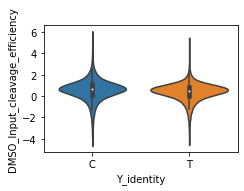

SVLst mean input_DMSO cleavage efficiency CA vs. TA =  0.5709065190395723 0.392981553351023
t-test ind SVLst input_DMSO cleavage efficiency CA vs. TA =  Ttest_indResult(statistic=31.887895268175328, pvalue=5.3173880470940655e-222)
Hedge's g =  0.19598920660806599
Cohen's d =  0.19599063676865128
n =  60971


/home/ec2-user/anaconda3/envs/tensorflow2_p37/lib/python3.7/site-packages/pingouin/effsize.py:779: UserWarning: x and y have unequal sizes. Switching to paired == False.
  warnings.warn("x and y have unequal sizes. Switching to " "paired == False.")


<Figure size 252x180 with 0 Axes>

In [5]:
"""
Plot estimated cleavage efficiencies from DMSO and input
"""

from scipy import stats
import matplotlib.pyplot as plt
from scipy.special import logit

# checking correlation between APARENT scores and input / DMSO reads
# calculating normalized input percentages, filtering for min coverage of 50 reads

def load_input_percentages(barcode_clusters_culled_file, min_cov=100):
    barcode_percents = {}
    with open(barcode_clusters_culled_file, "r") as f:
        f.readline()  # throw out header
        total_reads = 0
        for line in f:
            var = line.split("\t")
            barcode = var[0]
            coverage = float(var[2])
            total_reads += coverage
            if coverage >= min_cov:
                barcode_percents[barcode] = coverage

    for barcode, reads in barcode_percents.items():
        barcode_percents[barcode] = barcode_percents[barcode]/total_reads
    
    return barcode_percents


def load_DMSO_percentages_cutsite(PAS_read_counts_file, cut_site=46, min_cov=100):
    barcode_percents = {}
    with open(PAS_read_counts_file, "r") as f:
        total_reads = 0
        for line in f:
            var = line.split("\t")
            barcode = var[0]
            cut_pos = int(var[1])
            coverage = float(var[2])
            total_reads += coverage
            if coverage >= min_cov and cut_pos == cut_site:
                barcode_percents[barcode] = coverage

    for barcode, reads in barcode_percents.items():
        barcode_percents[barcode] = barcode_percents[barcode]/total_reads
    
    return barcode_percents


# L3 input
L3_barcode_clusters_culled_file = "/JTE-607/Analysis/parsed_L3_input_RNA_clusterPASRandom_bbmerge_xloose/L3_input_barcode_clusters_consensus_seq_culled.txt"
L3_barcode_percents = load_input_percentages(L3_barcode_clusters_culled_file, min_cov=1)

# SVLst input
SVLst_barcode_clusters_culled_file = "/JTE-607/Analysis/parsed_SVLst_input_RNA_clusterPASRandom_bbmerge_xloose/SVLst_input_barcode_clusters_consensus_seq_culled.txt"
SVLst_barcode_percents = load_input_percentages(SVLst_barcode_clusters_culled_file, min_cov=1)

# L3 DMSO
L3_DMSO_PAS_read_counts_file = "/JTE-607/Analysis/parsed_L3_input_RNA_clusterPASRandom_bbmerge_xloose/parsed_L3_cleaved_RNA_multimapping_mincov1_preload_bbmerge_xloose_H1shortN4indel/collapsed/L3_DMSO_polya_pos.txt"
L3_DMSO_barcode_percents = load_DMSO_percentages_cutsite(L3_DMSO_PAS_read_counts_file, cut_site=46, min_cov=1)

# SVLst DMSO
SVLst_DMSO_PAS_read_counts_file = "/JTE-607/Analysis/parsed_SVLst_input_RNA_clusterPASRandom_bbmerge_xloose/parsed_SVLst_cleaved_RNA_multimapping_mincov1_preload_bbmerge_xloose_H1shortN4indel/collapsed/SVLst_DMSO_polya_pos.txt"
SVLst_DMSO_barcode_percents = load_DMSO_percentages_cutsite(SVLst_DMSO_PAS_read_counts_file, cut_site=46, min_cov=1)

# Calculate estimated cleavage rate = DMSO % / input %
# L3 estimated cleavage rate
L3_cleaved_enrichment = {}
for PAS, input_percentage in L3_barcode_percents.items():
    if PAS in L3_DMSO_barcode_percents:
        p = L3_DMSO_barcode_percents[PAS] / (L3_DMSO_barcode_percents[PAS] + L3_barcode_percents[PAS])
        L3_cleaved_enrichment[PAS] = logit(p)
    #else:
    #    L3_cleaved_enrichment[PAS] = 0

# SVLst estimated cleavage rate
SVLst_cleaved_enrichment = {}
for PAS, input_percentage in SVLst_barcode_percents.items():
    if PAS in SVLst_DMSO_barcode_percents:
        p = SVLst_DMSO_barcode_percents[PAS] / (SVLst_DMSO_barcode_percents[PAS] + SVLst_barcode_percents[PAS])
        SVLst_cleaved_enrichment[PAS] = logit(p)
    #else:
    #    SVLst_cleaved_enrichment[PAS] = 0
# cleanup
del SVLst_DMSO_barcode_percents, SVLst_barcode_percents, L3_DMSO_barcode_percents, L3_barcode_percents

# plot L3 measured efficiences for CA vs. TA
L3_C_input_DMSO_vals = [L3_cleaved_enrichment[curr_seq] for curr_seq in L3_CA_seqs if curr_seq in L3_cleaved_enrichment]
L3_T_input_DMSO_vals = [L3_cleaved_enrichment[curr_seq] for curr_seq in L3_TA_seqs if curr_seq in L3_cleaved_enrichment]
L3_Y_input_DMSO_df = pd.DataFrame(list(zip(L3_C_input_DMSO_vals + L3_T_input_DMSO_vals, \
                                       ["C"] * len(L3_C_input_DMSO_vals) + ["T"] * len(L3_T_input_DMSO_vals))), \
                              columns = ["DMSO_Input_cleavage_efficiency", "Y_identity"])
L3_Y_input_DMSO_df.to_csv('/JTE-607/Analysis/Figures/Source_Data/L3_Y_input_DMSO_df.tsv', sep="\t", index=True)
sns.violinplot(data=L3_Y_input_DMSO_df, x="Y_identity", y="DMSO_Input_cleavage_efficiency", clip=0)
plt.tight_layout()
plt.savefig(figures_dir + "L3_YA_fullPAS_input_DMSO_scatter.pdf")
plt.show()
plt.clf()
print("L3 mean input_DMSO cleavage efficiency CA vs. TA = ", \
      np.mean(L3_C_input_DMSO_vals), np.mean(L3_T_input_DMSO_vals))
print("t-test ind L3 input_DMSO cleavage efficiency CA vs. TA = ", \
      stats.ttest_ind(L3_C_input_DMSO_vals, L3_T_input_DMSO_vals, equal_var=False))
print("Hedge's g = ", pg.compute_effsize(L3_C_input_DMSO_vals, L3_T_input_DMSO_vals, paired=True, eftype='hedges'))
print("Cohen's d = ", pg.compute_effsize(L3_C_input_DMSO_vals, L3_T_input_DMSO_vals, paired=True, eftype='cohen'))
print("n = ", len(L3_C_input_DMSO_vals))

# plot SVLst measured efficiences for CA vs. TA
SVLst_C_input_DMSO_vals = [SVLst_cleaved_enrichment[curr_seq] for curr_seq in SVLst_CA_seqs if curr_seq in SVLst_cleaved_enrichment]
SVLst_T_input_DMSO_vals = [SVLst_cleaved_enrichment[curr_seq] for curr_seq in SVLst_TA_seqs if curr_seq in SVLst_cleaved_enrichment]
SVLst_Y_input_DMSO_df = pd.DataFrame(list(zip(SVLst_C_input_DMSO_vals + SVLst_T_input_DMSO_vals, \
                                       ["C"] * len(SVLst_C_input_DMSO_vals) + ["T"] * len(SVLst_T_input_DMSO_vals))), \
                              columns = ["DMSO_Input_cleavage_efficiency", "Y_identity"])
SVLst_Y_input_DMSO_df.to_csv('/JTE-607/Analysis/Figures/Source_Data/SVLst_Y_input_DMSO_df.tsv', sep="\t", index=True)
sns.violinplot(data=SVLst_Y_input_DMSO_df, x="Y_identity", y="DMSO_Input_cleavage_efficiency", clip=0)
plt.tight_layout()
plt.savefig(figures_dir + "SVLst_YA_fullPAS_input_DMSO_scatter.pdf")
plt.show()
plt.clf()
print("SVLst mean input_DMSO cleavage efficiency CA vs. TA = ", \
      np.mean(SVLst_C_input_DMSO_vals), np.mean(SVLst_T_input_DMSO_vals))
print("t-test ind SVLst input_DMSO cleavage efficiency CA vs. TA = ", \
      stats.ttest_ind(SVLst_C_input_DMSO_vals, SVLst_T_input_DMSO_vals, equal_var=False))
print("Hedge's g = ", pg.compute_effsize(SVLst_C_input_DMSO_vals, SVLst_T_input_DMSO_vals, paired=True, eftype='hedges'))
print("Cohen's d = ", pg.compute_effsize(SVLst_C_input_DMSO_vals, SVLst_T_input_DMSO_vals, paired=True, eftype='cohen'))
print("n = ", len(SVLst_C_input_DMSO_vals))


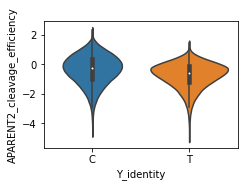

L3 mean APARENT2 cleavage efficiency CA vs. TA =  -0.3688559095875687 -0.7552449657657986
t-test ind L3 APARENT2 cleavage efficiency CA vs. TA =  Ttest_indResult(statistic=83.9609474202007, pvalue=0.0)
Hedge's g =  0.4187799234881038
Cohen's d =  0.4187819079511965
n =  84676


/home/ec2-user/anaconda3/envs/tensorflow2_p37/lib/python3.7/site-packages/pingouin/effsize.py:779: UserWarning: x and y have unequal sizes. Switching to paired == False.
  warnings.warn("x and y have unequal sizes. Switching to " "paired == False.")


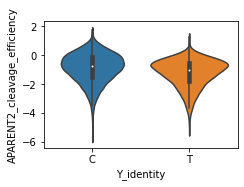

SVLst mean APARENT2 cleavage efficiency CA vs. TA =  -0.8746113436343989 -1.2313689339347424
t-test ind SVLst APARENT2 cleavage efficiency CA vs. TA =  Ttest_indResult(statistic=57.55281967237162, pvalue=0.0)
Hedge's g =  0.3618990858678399
Cohen's d =  0.3619017208506995
n =  61111


/home/ec2-user/anaconda3/envs/tensorflow2_p37/lib/python3.7/site-packages/pingouin/effsize.py:779: UserWarning: x and y have unequal sizes. Switching to paired == False.
  warnings.warn("x and y have unequal sizes. Switching to " "paired == False.")


<Figure size 252x180 with 0 Axes>

In [6]:
"""
Plot APARENT2 cleavage efficiencies
"""

# parsing through APARENT scores
APARENT_score_file = "/JTE-607/Analysis/parsed_L3_input_RNA_clusterPASRandom_bbmerge_xloose/parsed_L3_cleaved_RNA_multimapping_mincov1_preload_bbmerge_xloose/collapsed/all_DMSO_sequences_shifted_pred.csv"
L3_APARENT_iso_pred_cut_nuc_scores_dict = {}  # PAS_barcode -> APARENT score
SVLst_APARENT_iso_pred_cut_nuc_scores_dict = {}  # PAS_barcode -> APARENT score

with open(APARENT_score_file, "r") as f:
    f.readline()  # throw out header
    for line in f:
        var = line.split("\t")
        sequence = var[0]
        iso_pred_cut_nuc = float(var[14])  # iso_pred_cut_nuc
        PAS = sequence[76:101]  # b/c shifted to same location in APARENT
        if sequence[:3] == "NNN":
            # L3 variant
            if PAS in L3_barcodes_12p5uM:
                L3_APARENT_iso_pred_cut_nuc_scores_dict[PAS] = iso_pred_cut_nuc
        else:
            # SVLst variant
            if PAS in SVLst_barcodes_12p5uM:
                SVLst_APARENT_iso_pred_cut_nuc_scores_dict[PAS] = iso_pred_cut_nuc


L3_C_APARENT2_vals = [L3_APARENT_iso_pred_cut_nuc_scores_dict[curr_seq] for curr_seq in L3_CA_seqs if curr_seq in L3_APARENT_iso_pred_cut_nuc_scores_dict]
L3_T_APARENT2_vals = [L3_APARENT_iso_pred_cut_nuc_scores_dict[curr_seq] for curr_seq in L3_TA_seqs if curr_seq in L3_APARENT_iso_pred_cut_nuc_scores_dict]
L3_Y_APARENT2_df = pd.DataFrame(list(zip(L3_C_APARENT2_vals + L3_T_APARENT2_vals, \
                                       ["C"] * len(L3_C_APARENT2_vals) + ["T"] * len(L3_T_APARENT2_vals))), \
                              columns = ["APARENT2_cleavage_efficiency", "Y_identity"])
L3_Y_APARENT2_df.to_csv('/JTE-607/Analysis/Figures/Source_Data/L3_Y_APARENT2_df.tsv', sep="\t", index=True)
sns.violinplot(data=L3_Y_APARENT2_df, x="Y_identity", y="APARENT2_cleavage_efficiency", clip=0)
plt.tight_layout()
plt.savefig(figures_dir + "L3_YA_fullPAS_APARENT2_scatter.pdf")
plt.show()
plt.clf()
print("L3 mean APARENT2 cleavage efficiency CA vs. TA = ", \
      np.mean(L3_C_APARENT2_vals), np.mean(L3_T_APARENT2_vals))
print("t-test ind L3 APARENT2 cleavage efficiency CA vs. TA = ", \
      stats.ttest_ind(L3_C_APARENT2_vals, L3_T_APARENT2_vals, equal_var=False))
print("Hedge's g = ", pg.compute_effsize(L3_C_APARENT2_vals, L3_T_APARENT2_vals, paired=True, eftype='hedges'))
print("Cohen's d = ", pg.compute_effsize(L3_C_APARENT2_vals, L3_T_APARENT2_vals, paired=True, eftype='cohen'))
print("n = ", len(L3_C_APARENT2_vals))

SVLst_C_APARENT2_vals = [SVLst_APARENT_iso_pred_cut_nuc_scores_dict[curr_seq] for curr_seq in SVLst_CA_seqs if curr_seq in SVLst_APARENT_iso_pred_cut_nuc_scores_dict]
SVLst_T_APARENT2_vals = [SVLst_APARENT_iso_pred_cut_nuc_scores_dict[curr_seq] for curr_seq in SVLst_TA_seqs if curr_seq in SVLst_APARENT_iso_pred_cut_nuc_scores_dict]
SVLst_Y_APARENT2_df = pd.DataFrame(list(zip(SVLst_C_APARENT2_vals + SVLst_T_APARENT2_vals, \
                                       ["C"] * len(SVLst_C_APARENT2_vals) + ["T"] * len(SVLst_T_APARENT2_vals))), \
                              columns = ["APARENT2_cleavage_efficiency", "Y_identity"])
SVLst_Y_APARENT2_df.to_csv('/JTE-607/Analysis/Figures/Source_Data/SVLst_Y_APARENT2_df.tsv', sep="\t", index=True)
sns.violinplot(data=SVLst_Y_APARENT2_df, x="Y_identity", y="APARENT2_cleavage_efficiency", clip=0)
plt.tight_layout()
plt.savefig(figures_dir + "SVLst_YA_fullPAS_APARENT2_scatter.pdf")
plt.show()
plt.clf()
print("SVLst mean APARENT2 cleavage efficiency CA vs. TA = ", \
      np.mean(SVLst_C_APARENT2_vals), np.mean(SVLst_T_APARENT2_vals))
print("t-test ind SVLst APARENT2 cleavage efficiency CA vs. TA = ", \
      stats.ttest_ind(SVLst_C_APARENT2_vals, SVLst_T_APARENT2_vals, equal_var=False))
print("Hedge's g = ", pg.compute_effsize(SVLst_C_APARENT2_vals, SVLst_T_APARENT2_vals, paired=True, eftype='hedges'))
print("Cohen's d = ", pg.compute_effsize(SVLst_C_APARENT2_vals, SVLst_T_APARENT2_vals, paired=True, eftype='cohen'))
print("n = ", len(SVLst_C_APARENT2_vals))
